In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [10]:
df = pd.read_csv('clean_df.csv', index_col=0)
df.head()

,year,name,age,games_played,games_started,minutes_played,PER,TS%,3PAr,FTr,...,college_Western Kentucky University,college_Western Michigan University,college_Wichita State University,college_William Paterson University,college_Wingate University,college_Winston-Salem State University,college_Wright State University,college_Xavier University,college_Xavier University of Louisiana,college_Yale University
0,1974,Zaid Abdul-Aziz,27.0,79,50,2459.0,15.9,0.516,0.0,0.328,...,0,0,0,0,0,0,0,0,0,0
1,1974,Kareem Abdul-Jabbar,26.0,81,72,3548.0,24.4,0.564,0.0,0.239,...,0,0,0,0,0,0,0,0,0,0
2,1974,Don Adams,26.0,74,46,2298.0,10.9,0.457,0.0,0.271,...,0,0,0,0,0,0,0,0,0,0
3,1974,Rick Adelman,27.0,55,12,618.0,10.0,0.447,0.0,0.447,...,0,0,0,0,0,0,0,0,0,0
4,1974,Lucius Allen,26.0,72,48,2388.0,18.8,0.536,0.0,0.258,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20529 entries, 0 to 20758
Columns: 619 entries, year to college_Yale University
dtypes: float64(44), int64(574), object(1)
memory usage: 97.1+ MB


In [12]:
# 1. Load data
X = df.drop(columns=['hall_of_fame', 'name', 'year'])
y = df['hall_of_fame']

# 2. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 3. Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
my_KBest = SelectKBest(f_classif, k=30).fit(X_train, y_train)
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
my_KBest.get_support()

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 75  89 163 255 278 301 363 371 449 502 577 597] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

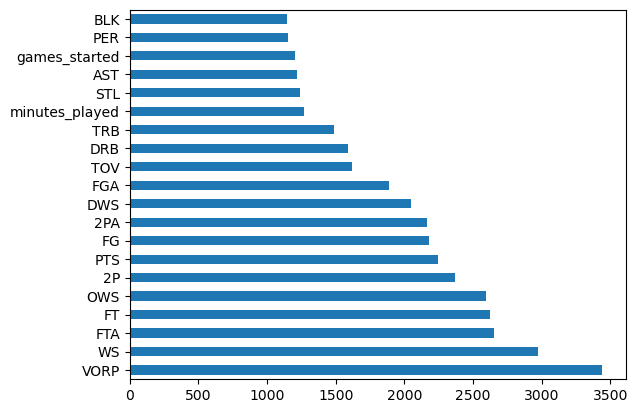

In [14]:
pd.Series(index=X.columns, data=my_KBest.scores_).sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

In [24]:
train_acc = []
test_acc = []

for k in range(1, 100):
    my_KBest = SelectKBest(r_regression, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_test_selected = my_KBest.transform(X_test)
    
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_selected, y_train)
    
    train_acc.append(model.score(X_train_selected, y_train))
    test_acc.append(model.score(X_test_selected, y_test))

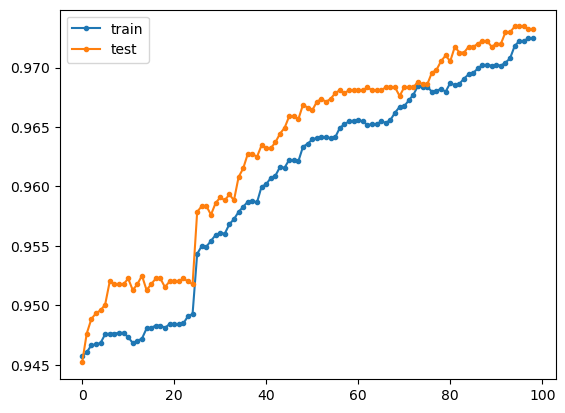

In [25]:
plt.figure()
plt.plot(train_acc, label='train', marker='.')
plt.plot(test_acc, label='test', marker='.')
plt.legend()
plt.show()

In [27]:
my_KBest = SelectKBest(r_regression, k=26).fit(X_train, y_train)
    
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
    
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

model.score(X_test_selected, y_test)

0.9578665367754505

There seems to be a jump in performance at 26 features. Even though we could reasonably go lower, to prevent overfitting, we will stick with 26 features.